Consider two antennas sampling a sky signal. Let each antenna introduce a series of reflections
\begin{equation}
v_1(t) = \sum_m r_1(\tau_m)v(t-\tau_m) 
\end{equation}
and a second antenna where the signal is delayed by an additional geometric factor of $\tau$ as is the case in an interferometer.
\begin{equation}
v_2(t) = \sum_n r_2(\tau_m)v(t-\tau_n+ \tau)
\end{equation}
It has been recently claimed, that the result of a correlation between the two antennas only depends on the product of the virst visibility with zero delay reflection of the second
\begin{equation}
\widetilde{V}_{12}(f) = \sum_m r_m \langle |v(t - \tau_m) |^2 \rangle?
\end{equation}
or
\begin{equation}
V_{12}(f) = \langle |\widetilde{v}(f)|^2 \rangle \sum_m r_m e^{2 \pi i f (\tau_m- \tau)}?
\end{equation}
This immediately strikes me as wrong for two reasons. First, if the two antennas have different reflections, the delay structure of the visibility given in the above equation depends on the choice of first or second antenna. In order for this to not be the case, the equation for visibility contamination must have terms from both antennas. Second, one can directly calculate the correlation using the Fourier Convolution Theorem. The correlator measures the Fourier transform of the correlation of the two signals (or equivalently the product of their Fourier transforms). 
\begin{align}
V_{12}(f) &=\int dt e^{2 \pi i f t} \left \langle \int dt' \sum_m r_1(\tau_m) v(t-\tau_m) \sum_n r_2(\tau_n) v(t-\tau_n+\tau-t')\right \rangle\\
&= \left \langle \sum_m r_m \widetilde{v}(f)e^{2 \pi i f \tau_m} \sum_n r_n^* \widetilde{v}^*(f)e^{2 \pi i f \tau_n} \right \rangle e^{-2 \pi i \tau}\\
&= \sum_{m,n} r_m r_n^* e^{2 \pi i \Delta \tau_{mn} } \left \langle | \widetilde{v}(f)|^2 \right \rangle e^{- 2 \pi i \tau}
\end{align}
This is precisely the mathematical steps that an FX correlator performs.

To double check my math, I run a numerical simulation. I take a single stream of gaussian random noise with an independent sample every 1 ns. I sample for 1 $\mu$s. In the first antenna, I assume that there is a reflection at 90 ns and 180 ns (both with amplitude .5) and in the second I assume a reflection at  400 ns and 600 ns. (with amplitude .25). I assume that both antennas are offset by 100 ns (to account for hypothetical geometrical delay). I average the correlation of the signals over 10 draws.

In [189]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [246]:
ndraw=10
nt=1000
offset=0
ampList1=[1.,.5,.5]
ampList2=[1.,.25,.25]
delayList1=[0,90,180]
delayList2=[0,250,350]

#delayList1=np.arange(20).astype(int)
#ampList1=((1.+delayList1.astype(float))/100.)*-1
#delayList2=delayList1
#ampList2=ampList1*.2
          
CrossCorr=np.zeros(nt)
for draw in range(ndraw):
    sample=np.random.randn(2*nt)
    sig1=np.zeros(nt)
    sig2=np.zeros(nt)
    for dNum in range(len(delayList1)):
        sig1+=ampList1[dNum]*sample[(0+delayList1[dNum]):(delayList1[dNum]+nt)]
    for dNum in range(len(delayList2)):
        sig2+=ampList2[dNum]*sample[(0+delayList2[dNum]+offset):(delayList2[dNum]+nt+offset)]
    CrossCorr+=np.correlate(sig1,sig2,mode='same')
CrossCorr=CrossCorr/(ndraw*nt)
tList=np.arange(-nt/2,nt/2)

theory=np.zeros(nt)
for mm in range(len(ampList1)):
    for nn in range(len(ampList2)):
        theory[-delayList1[mm]+delayList2[nn]+offset+500]+=ampList1[mm]*ampList2[nn]

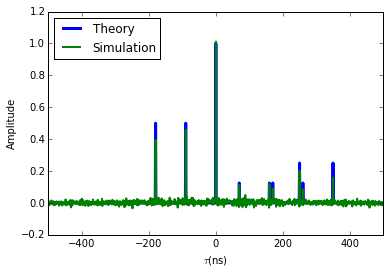

In [248]:
plt.plot(tList,theory,lw=3,label='Theory')
plt.plot(tList,CrossCorr,lw=2,label='Simulation')
"""
for mm in range(len(delayList1)):
    for nn in range(len(delayList2)):
        if(mm==0 or nn==0):
            plt.axvline(-delayList1[mm]+delayList2[nn]+offset,color='k',ls='-',lw=.5)
        else:
            plt.axvline(-delayList1[mm]+delayList2[nn]+offset,color='k',ls='--',lw=.5)
"""
plt.xlabel('$\\tau$(ns)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)
plt.legend(loc='upper left')